# 다항회귀모형(Polynomial Regression)

피쳐들(독립변수)과 레이블(종속변수)이 2차 함수 이상의 관계를 가지는 것으로 곡선이나 좀 더 복잡한 모양을 표현하는 것이 가능한 회귀 모형

단순히 독립변수를 제곱한 파생변수를 추가하고 다중선형회귀를 적용한다.

![img](res/1.png)

## #01. 준비작업

### [1] 패키지 참조

In [1]:
%%time

import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from help_a.regression import *
from help_a.util import *
from help_a.plot import *
from help_a.analysis import *

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import DataFrame

CPU times: total: 391 ms
Wall time: 426 ms


### [2] 데이터 가져오기

자동차의 속도와 제동거리 데이터

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/cars.xlsx", info=False)
my_pretty_table(origin.head())

+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
|  0 |       4 |      2 |
|  1 |       4 |     10 |
|  2 |       7 |      4 |
|  3 |       7 |     22 |
|  4 |       8 |     16 |
+----+---------+--------+


## #02. 탐색적 데이터 분석

### [1] 산점도 그래프 시각화

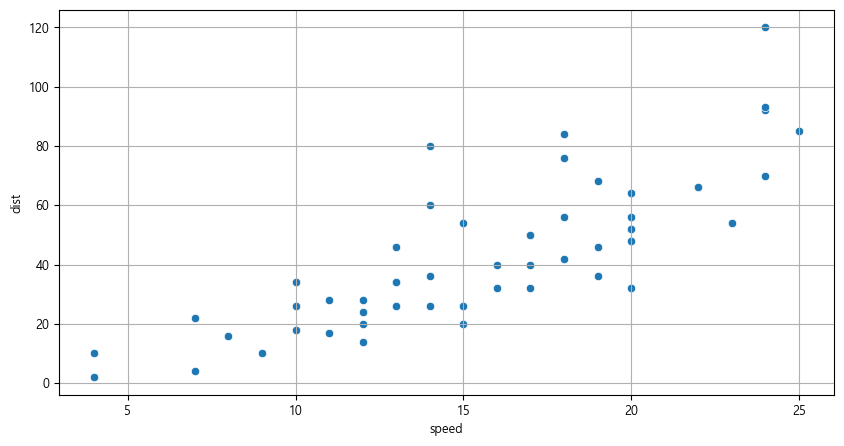

In [3]:
my_scatterplot(origin, "speed", "dist", figsize=(10, 5), dpi=100)


> 속도에 따른 제동거리를 시각화 했을 때 선형보다는 곡선에 가까운 배치를 보인다.

## #03. 단순선형회귀의 경우

> 여기서는 좀 더 높은 설명력을 얻기 위해 데이터를 분할하지 않고 훈련데이터에 대해서만 score를 얻도록 함

### (1) 회귀모형 생성

In [4]:
fit = my_linear_regression(origin[['speed']], origin['dist'], use_plot=False, report=False)

[회귀식]
dist = 3.932 * speed + -17.579

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.651079 |             11.5801 |              227.07 |          15.0689 |                         38.3688 |              -8.28381 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+


### 실제 데이터와 예측치 시각화

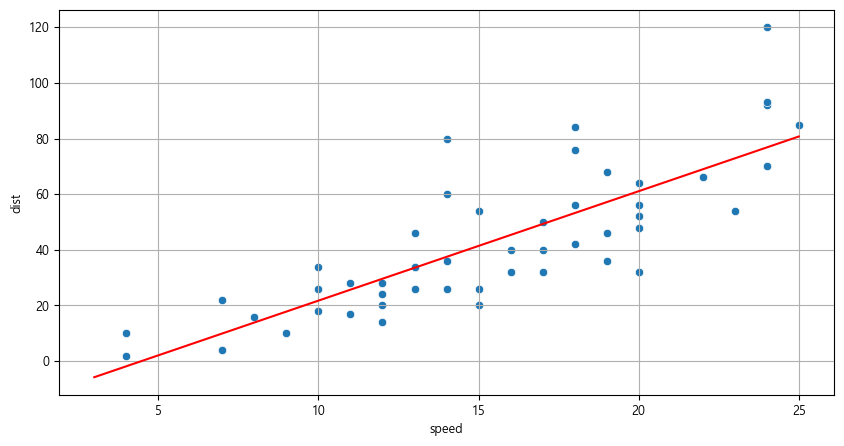

In [6]:
plt.figure(figsize=(10, 5), dpi=100)

sb.scatterplot(x='speed', y='dist', data=origin)

xmin, xmax = plt.xlim()
xrange = np.arange(xmin.round(), xmax.round())
y_pred = fit.predict(xrange.reshape(-1, 1))
sb.lineplot(x=xrange, y=y_pred, color='red')
      
plt.grid()
plt.show()
plt.close()

## #04. 다항회귀의 경우

### [1] 독립변수에 대한 2차항을 추가

In [10]:
df = origin.copy()
df['e^speed'] = np.exp(df['speed'])
my_pretty_table(df.head())

+----+---------+--------+-----------+
|    |   speed |   dist |   e^speed |
|----+---------+--------+-----------|
|  0 |       4 |      2 |   54.5982 |
|  1 |       4 |     10 |   54.5982 |
|  2 |       7 |      4 |   1096.63 |
|  3 |       7 |     22 |   1096.63 |
|  4 |       8 |     16 |   2980.96 |
+----+---------+--------+-----------+


### [2] 다중선형회귀 적용

In [12]:
x = df[['speed', 'e^speed']]
y = df['dist']
fit = my_linear_regression(x, y, use_plot=False, report=True)

[회귀식]
dist = 3.480 * speed + 0.000 * e^speed + -12.014

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.672009 |             11.1156 |              213.45 |          14.6099 |                         33.8209 |              -13.4577 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |     t |   유의확률 |     VIF |
|---

### [3] 결과 시각화

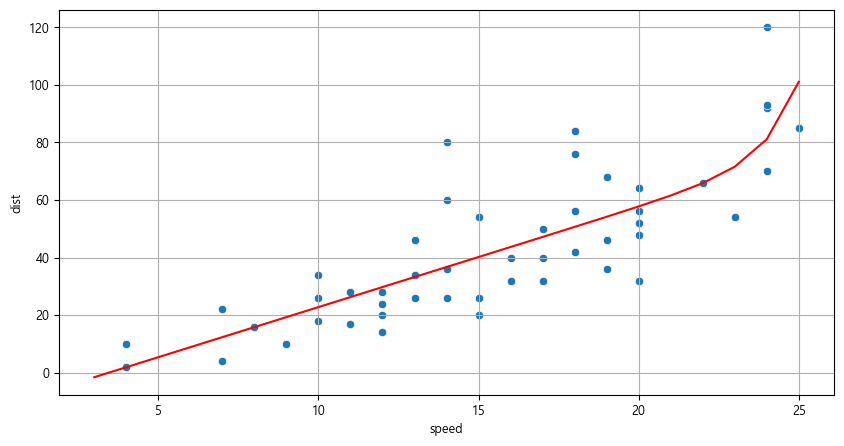

In [17]:
plt.figure(figsize=(10, 5), dpi=100)

sb.scatterplot(x='speed', y='dist', data=df)

xmin, xmax = plt.xlim()
xrange = np.arange(xmin.round(), xmax.round())
xrange2 = np.exp(xrange)
xdf = DataFrame({'speed': xrange, 'e^speed': xrange2})
y_pred = fit.predict(xdf)
sb.lineplot(x=xrange, y=y_pred, color='red')
      
plt.grid()
plt.show()
plt.close()